<a href="https://colab.research.google.com/github/Letch49/ML_vvsu_2024/blob/master/lab2/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 2

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

In [2]:
df = pd.read_csv("student-mat.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


Категориальная целевая переменная - famsize(Y); Переменная для анализа относительно категории - age (X)

In [3]:
describe =  df['age'].describe()
describe

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [4]:
agg = df.groupby(['famsize']).agg({'age': ['mean', 'median', 'min', 'max', np.std, pd.Series.mode]})
agg

C:\Users\vadik\AppData\Local\Temp\ipykernel_7912\3229784944.py:1: FutureWarning: The provided callable <function std at 0x000001F739B7C860> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  agg = df.groupby(['famsize']).agg({'age': ['mean', 'median', 'min', 'max', np.std, pd.Series.mode]})


age                                   
             mean median min max       std      mode
famsize                                             
GT3      16.66548   17.0  15  22  1.299114        16
LE3      16.77193   17.0  15  20  1.219568  [17, 18]

In [5]:
mean = df["age"].mean()
mean

16.696202531645568

In [6]:
median = df["age"].median()
median

17.0

In [7]:
# Мода
mode = df["age"].mode()
mode

0    16
Name: age, dtype: int64

In [8]:
min = df["age"].min()
min

15

In [9]:
max = df["age"].max()
max

22

In [10]:
# Стандартное отклонение
std = df["age"].std()
std

1.2760427246056283

Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [11]:
q1 = df.groupby(['famsize'])['age'].quantile(0.25)
q1

famsize
GT3    16.0
LE3    16.0
Name: age, dtype: float64

In [12]:
q2 = df.groupby(['famsize'])['age'].quantile(0.5)
# Медиана
q2

famsize
GT3    17.0
LE3    17.0
Name: age, dtype: float64

In [13]:
q3 = df.groupby(['famsize'])['age'].quantile(0.75)
q3

famsize
GT3    18.0
LE3    18.0
Name: age, dtype: float64

In [14]:
iqr = q3 - q1
iqr

famsize
GT3    2.0
LE3    2.0
Name: age, dtype: float64

Какие выводы можно сделать исходя из полученных статистических данных?

**Ответ**

```
Example: видим, что среднее и отклонение различается между группами, следовательно...
Сделать подобные выводы относительно других статистических характеристик

1. Возраст учеников составляет от 15 до 22 лет.
2. Средний возраст учащихся - чуть более 16 лет
3. Возраст большинства учеников составляет 16 лет.
4. Интерквартальный размах составил 2 единицы т.е. 2 года


```

##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

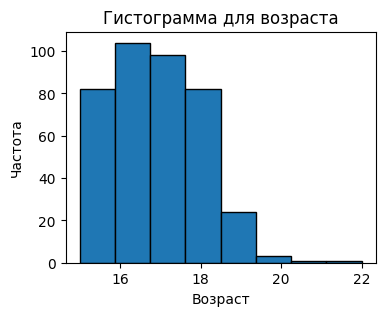

In [15]:
plt.figure(figsize=(4, 3))
plt.hist(df['age'], bins=8, edgecolor='black')
plt.title('Гистограмма для возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

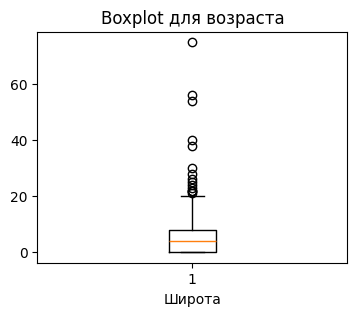

In [16]:
plt.figure(figsize=(4, 3))
plt.boxplot(df['absences'])
plt.title('Boxplot для возраста')
plt.xlabel('Широта')
plt.show()

Постройте диаграмму рассеивания для числовых признаков вашего датасета.

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

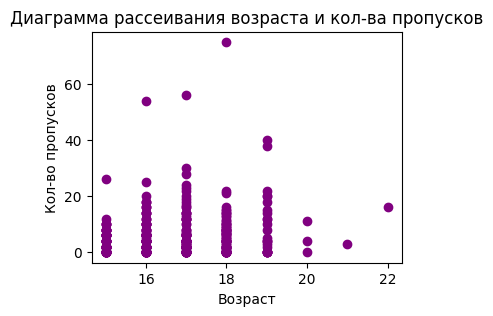

In [23]:
plt.figure(figsize=(4, 3))
plt.scatter(df['age'], df['absences'], color='purple')
plt.title('Диаграмма рассеивания возраста и кол-ва пропусков')
plt.xlabel('Возраст')
plt.ylabel('Кол-во пропусков')
plt.show()

Постройте матрицу корреляции для двух числовых признаков вашего датасета.

<Axes: >

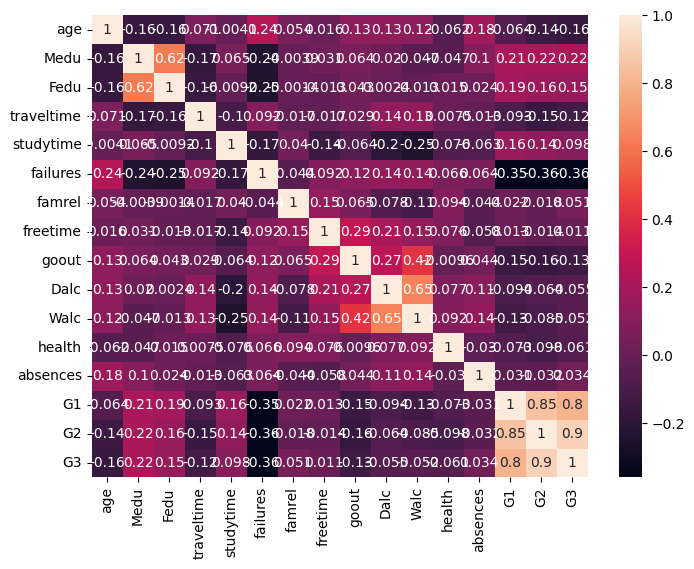

In [19]:
numericArr = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# Вычисление корреляционной матрицы
corr_matrix = df[numericArr].corr()

# Визуализация корреляции
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)

Какие выводы можно сделать на основе графиков и матрицы корреляции?


1. Основная масса людей в возрасте от 15 до 18 лет, что видно на гистограмме.
2. Выборка имеет большое количество выбросов, что видно в графике boxplot
3. На диаграмме рассеивания возраста и количества пропусков так же видны выбросы
4. Матрица корреляции построена по всем числовым признакам датасета и отображает их корреляцию между собой

**Ответ здесь**

##Задание для гениев*

Реализовать следующие методы поиска выбросов:
1. На основе среднего и отклонения
2. Критерий Шовене
3. С помощью квартилей
4. Поиск выбросов по двум переменным

[Посмотреть](http://course.omgtu.ru/wp-content/uploads/2021/04/3_%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D1%8B.pdf)

P.S. в качестве возвразаемого значения методов может быть:
1. очищенный датафрейм
2. индексы выбросов ```df.series.index```

In [20]:
"""

Ваш код здесь

"""

'\n\nВаш код здесь\n\n'

### Пример реализации одного метода

In [21]:
from statistics import median, mean

class Outline:
  def __init__(self, df):
    self.df = df

  def delete_outline_by_mean(self, column_name):
    mean_data = mean(self.df[column_name])
    maximum = mean_data * 2
    result = []

    for item in self.df[column_name]:
      if abs(item - mean_data) < maximum:
        result.append(item)

    return result



In [22]:
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 3, 4, 5, 1000],
        "col2": [1, 2, 3, 2, 1, 4]
    }
)

so = Outline(data)
so.delete_outline_by_mean("col1")

[1, 2, 3, 4, 5]